In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline


# ECS7024 Statistics for Artificial Intelligence and Data Science

## Coursework 2

This notebook will analyse data on bridges in the state of Texas. It will look specifically at bridge condition and how well some partiuclar variables can predict the bridge condition. The predictor variables will be:

* Age (derived from variable Year)
* Average use (variable AverageDaily)
* Percent trucks (variable Trucks_percent)
* Material (variable Material)
* Design (variable Design)



**Table of Contents**


 1. Section 1: Data Preperation
     1. Introducing the Data Set
     1. Identify Null Values
     1. Deriving An Age Variable
     1. Merging Categories
     1. Bridge Condition Variable  

&NewLine;

 2. Section 2: Exploratory Analysis
     1. Relationships Between Continuous Variables
     1. Relationships Between Categorical and Continuous Variables
     1. Relationships Between Categorical Variables

&NewLine;

 3. Section 3: Regression Modelling
     1. Creating Dummy Variables
     1. Fitting The Regression Line
     1. Comparing Coefficients
     1. Error Distribution
     1. Conclusion

&NewLine;

 4. Section 4: References



## Section 1: Data Preperation

### 1. A. Introducing the Data Set

This notebook looks at some data from the US National Bridge Inspection maintained by the Federal Highways Agency (FHWA), part of the US Department of Transportation. The original data comes from the [National Bridge Inspection](https://www.fhwa.dot.gov/bridge/nbi/ascii.cfm) section of the FHWA's web site. However, it has been greatly simplified. If you are interested in a particular bridge, you can use the structure number to look it up (including on google maps, where the satellite imaging shows a picture) on the (Info Bridge System)[https://infobridge.fhwa.dot.gov/].

**The aim of the Bridge Inspection programme is to check on the state of bridges so that necessary repairs can be carried out. If this is not done, a bridge can fail. The dataset has information about the bridges and the condition given in the most recent inspection.**

* The FHWA's database covers the whole USA. Our data is only for the state of Texas. 
* As well as bridges, the FHWA's database covers tunnels (there seem to be no highway tunnels in Texas) and 'culverts'. A culvert is a form of drain, allowing water to pass under a highway. The culverts have been removed, leaving only the bridges.
* All of the bridges carry a highway (that is, a road runs over the bridge). What is underneath varies: another road, a waterway or a railway are among the possibilities. 

#### The Variables
The original FHWA dataset has over 100 variables (Texas collects even more); ours is simplified. Both continuous and categorical variables are included. 


| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Structure_id   | Unique identifier of the bridge                  | String |
|District       | Highway district in Texas responsible for bridge | category | 
|Detour_Km      | Length of detour if bridge closed                | continuous |
|Toll           | Whether a toll is paid to use bridge             | category |
|Maintainer     | The authority responsible for maintenance        | category |
|Urban          | Whether the bridge is located in an urban or rural area   | category |
|Status         | The road class: interstate to local                       | category | 
|Year           | The year the bridge was built                             | continuous | 
|Lanes_on       | The number of lanes that run over the bridge              | continuous (or discrete) |
|Lanes_under    | The number of lanes that run under the bridge             | continuous (or discrete) |
|AverageDaily   | The average daily traffic (number of vehicles)            | continuous |
|Future_traffic | The estimated daily traffic in approx 20 years time       | continuous |
|Trucks_percent | The percent of traffic made up of 'trucks' (i.e. lorries) | continuous |
|Historic       | Whether the bridge is historic                            | category | 
|Service_under  | The (most important) service that runs under the bridge   | category |
|Material       | The dominant material the bridge is made from             | category |
|Design         | The design of the bridge                                  | category |
|Spans          | The number of spans the bridge has                        | category (or discrete) |
|Length         | The length of the bridge in metres                        | continuous |
|Width          | The width of the bridge in metres                         | continuous |
|Rated_load     | The rated max loading of bridge (in tonnes)               | continuous |
|Scour_rating   | Only for bridges over water: the 'scour' condition        | ordinal |
|Deck_rating    | The condition of the deck of the bridge                   | ordinal |
|Superstr_rating| The condition of the bridge superstructure                | ordinal |
|Substr_rating  | The condition of the bridge substructure (foundations)    | ordinal |

**Note on 'scour'**: when a bridge is over (for example) a river, the flow of water in the river can undermine any bridge supports (called 'piers') in the water. This is called 'scouring' . The `Scour_rating` gives the condition with respect to possible damage from scouring. 
 
**Values of Categorical Variables** In the original data, the values of the categorical variables are represented as integers, with their meanings given in a data dictionary. In our dataset, these 'numeric codes' have been replaced with suitable names.

| Variable      |      Values            |
|:--------------|:-----------------------|
|District       | Each district has a unique number  |
|Toll           | Toll, Free                |
|Maintainer     | State, County, Town or City, Agency, Private, Railroad, Toll Authority, Military, Unknown |
|Urban          | Urban, Rural |
|Status         | Interstate, Arterial, Minor, Local |
|Historic       | Register, Possible, Unknown, Not historic |
|Service_under  | Other, Highway, Railroad, Pedestrian, Interchange, Building |
|Material       | Other, Concrete, Steel, Timber, Masonry |
|Design         | Other, Slab, Beam, Frame, Truss, Arch, Suspension, Movable, Tunnel, Culvert, Mixed |
|Scour_rating   | Unknown, Critical, Unstable, Stable, Protected, Dry, No waterway |
|Deck_rating    | *Rating*: NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed |
|Superstr_rating| *Rating* |
|Substr_rating  | *Rating* |

Below, the data is loaded and the data displayed. Each of the variables have their types specified to ensure that the data is processed correctly. The data has been loaded into a dataframe 'Bridges'.

In [2]:
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent', 'NA'], 
    ordered=True)

scour_type = pd.CategoricalDtype(
    categories=['Unknown', 'Critical','Unstable', 'Stable', 'Protected', 'Dry', 'No waterway'], 
    ordered=True)

types_dict = { 'Structure_id': str, 'District':'category', 'Toll':'category', 
              'Maintainer':'category', 'Urban':'category', 'Status':'category', 
              'Historic':'category', 'Service_under':'category', 'Material':'category', 
              'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type, 
              'Scour_rating':scour_type}

bridges = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict, index_col = 'Structure_id')
bridges

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


### 1. B. Identify Null Values

Firstly it is important to identify any null values as these could prevent analysis at a future point.

In [3]:
bridges.loc[(bridges.Deck_rating.isnull()) | (bridges.Superstr_rating.isnull()) ]

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
010920004518118,District1,0,Free,State,Rural,Arterial,1970,2,2,7520,...,1,42.7,12.2,NaN,Good,Good,32.7,2.0,No waterway,10530
021200AA0205001,District2,11,Free,County,Rural,Local,1946,1,0,340,...,1,17.7,3.9,Good,NaN,Fair,11.8,0.0,Stable,390
031690AA0273001,District3,5,Free,County,Rural,Local,2008,2,0,20,...,1,12.2,7.2,NaN,Very Good,Very Good,32.7,0.0,Dry,40
121020B37610001,District12,2,Free,Town or City,Urban,Local,2008,2,0,100,...,1,15.2,8.2,NaN,Good,Good,32.7,0.0,Stable,150
131580AA0323001,District13,159,Free,County,Rural,Local,1999,1,0,60,...,1,8.5,6.0,NaN,Very Good,Good,32.7,0.0,Dry,100
190190102001006,District19,10,Free,State,Rural,Minor,1991,2,0,160,...,4,67.1,9.1,NaN,Good,Good,32.7,16.0,Dry,230
211090AA0348002,District21,6,Free,County,Rural,Local,1960,2,0,50,...,3,11.0,5.5,Failing,NaN,Poor,0.0,0.0,Stable,30


Null values could be treated by replacing the value with an average value of that variable, however, as in this case only 7 of 34293 instances has a null value, these instances can be dropped from the data without having too much of an affect on the analysis.

The instances are now dropped and this new data frame is named 'bridges2'

In [4]:
bridges2 = bridges.dropna()

### 1. C. Deriving An Age Variable

The management of the Texas Department of Transportation has requested that one of the predictor variables in this analysis be 'Age'. As there is no 'Age' variable in the current data set, one needs to be derived from the 'Year' variable. This is done by subtracting the value in the 'Year' column from 2021 for each instance and then adding this to the data frame as a new column 'Age_In_Years'.

In [5]:
bridges2 = bridges2.assign(Age_In_Years = (2021 - bridges2.loc[:, 'Year']))
bridges2

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age_In_Years
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,16
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,16
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120,71
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600,27
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600,21
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,25


It is also suggested that all very old bridges should be excluded, possibly the historic ones. However, before filtering the data based on the 'Historic' category, it is important to see the distribution of the 'Historic' categories with regards to age.

Text(0.5, 0, 'Historic')

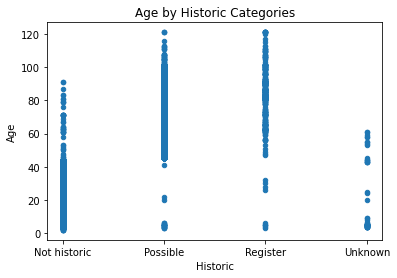

In [6]:
a1 = bridges2.plot(kind='scatter',  x='Historic', y='Age_In_Years')

a1.set_title('Age by Historic Categories')
a1.set_ylabel('Age')
a1.set_xlabel('Historic')

The above figure shows that just because a bridge is registered as historic does not necessarily mean that the bridge is old. There are several registered bridges that are fairly young.

As it was suggested to remove very old bridges using the 'Historic' category to help in filtering these bridges, the descriptive statistics of the 'Not Historic' bridges will now be looked at and the data frame will be filtered by only including bridges that are younger or of equal age to the oldest 'Not Historic' bridge.

In [7]:
Not_Historic = bridges2.loc[bridges2['Historic'] == 'Not historic']

Not_Historic.loc[:, 'Age_In_Years'].describe()

count    19908.000000
mean        22.524362
std         11.491873
min          2.000000
25%         13.000000
50%         22.000000
75%         32.000000
max         91.000000
Name: Age_In_Years, dtype: float64

The max age of 'Not Historic' bridges is 91, therefore the 'brdiges2' data frame below has been filtered to only contain bridges of age 91 or lower.

In [8]:
bridges2 = bridges2.loc[bridges2['Age_In_Years'] <= 91]


bridges2

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age_In_Years
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,16
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,16
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120,71
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600,27
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600,21
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,25


### 1. D. Merging Categories

It has been suggested to reduce the number of categories within the Material and Design variables by merging some of the very small categories. This will be done by:

• Examining the value counts of each category in the variable. 

• Establishing which ones are small.

• Adding a new column where the small categories are named 'Other', which will merge them with the 'Other' category.

#### Merge Material Categories

From the value counts below it is clear that 'Other' and 'Masonry' have especially low value counts and therefore can be merged. 'Timber' is a slightly bigger category  however it is still  significantly smaller than 'Concrete' and 'Steel' and as the specialist is particularly concerned with metal corrosion and the deterioration of concrete, 'Timber' will also be merged with 'Other' and 'Masonry' and added to a new column of simplified material categories (SimpMat).

In [9]:
bridges2.loc[:, 'Material'].value_counts()

Concrete    26507
Steel        6517
Timber        465
Other          47
Masonry         9
Name: Material, dtype: int64

In [10]:
simp_mat_type = pd.CategoricalDtype(categories=['Other', 'Steel', 'Concrete'])

mat_d = {'Masonry': 'Other', 'Timber': 'Other'}

def simDmat(row):
    if row.Material in mat_d:
        return mat_d[row.Material]
    return row.Material

bridges2 = bridges2.assign(SimpMat = bridges.apply(simDmat, axis=1))
bridges2 = bridges2.astype({'SimpMat':simp_mat_type})

bridges2





,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age_In_Years,SimpMat
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,16,Concrete
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,16,Concrete
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9,Concrete
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,3.7,Good,Good,Poor,10.0,0.0,Dry,120,71,Other
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,17,Concrete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,19.0,Good,Good,Good,64.3,40.0,No waterway,600,27,Concrete
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,10.8,Good,Good,Good,35.1,40.0,No waterway,600,21,Concrete
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,25,Concrete


#### Merge Design Categories

As 'Other' is the category that will be the name of the new merged category, any category with a value count lower than 'Other' will be merged. From the value counts below the categories to be merged will be 'Arch', 'Frame', 'Truss', 'Movable' and 'Suspension'. These will all be given the new value of 'Other' and added to a new column of simplified design categories (SimpDes).

In [11]:
bridges2.loc[:, 'Design'].value_counts()

Beam          27972
Slab           4041
Other          1234
Arch            126
Truss            86
Frame            68
Movable          13
Suspension        5
Name: Design, dtype: int64

In [12]:
simp_des_type = pd.CategoricalDtype(categories=['Other', 'Slab', 'Beam'])

des_d = {'Arch': 'Other', 'Frame': 'Other', 'Truss': 'Other', 'Movable': 'Other', 'Suspension': 'Other'}

def simDdes(row):
    if row.Design in des_d:
        return des_d[row.Design]
    return row.Design

bridges2 = bridges2.assign(SimpDes = bridges.apply(simDdes, axis=1))
bridges2 = bridges2.astype({'SimpDes':simp_des_type})
bridges2

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age_In_Years,SimpMat,SimpDes
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,Good,Very Good,Very Good,41.7,0.0,Dry,1,16,Concrete,Slab
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,Good,Good,Very Good,41.7,0.0,Dry,1,16,Concrete,Slab
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9,Concrete,Beam
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,Good,Good,Poor,10.0,0.0,Dry,120,71,Other,Beam
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,Good,Very Good,Very Good,37.2,4.0,Dry,200,17,Concrete,Beam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,Good,Good,Good,64.3,40.0,No waterway,600,27,Concrete,Beam
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,Good,Good,Good,35.1,40.0,No waterway,600,21,Concrete,Beam
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,Good,Good,Good,24.5,25.0,No waterway,1500,25,Concrete,Beam


### 1. E. Bridge Condition Variable

The current condition of the bridges can be derived from the variables Deck_rating, Superstr_rating and Substr_rating. To ensure that the regression analysis can be done, these variables need to be in a continuous format. Therefore, every category will be changed to an integer value ('Failed' will change to 0, 'Failing' to 1, 'Critical' to 2,  'Serious' to 3, 'Poor' to 4, 'Fair' to 5, 'Satisfactory' to 6, 'Good' to 7, 'Very Good' to 8, 'Excellent' to 9)

This will be done for each of the variables Deck_rating, Superstr_rating and Substr_rating, and the resulting score will be added to new columns named 'Deck_rat_int', 'Superstr_rat_int' and 'Substr_rat_int' respectively.

The values in each of these new columns can now be summed to give a rating out of 27 of the bridges' current condition (with higher score equating to better condition). These values will then be added to a new column named 'Total_Rating'.




In [13]:
rat_int_d = {'Failed': 0, 'Failing': 1, 'Critical': 2, 'Serious': 3, 'Poor': 4, 'Fair': 5, 'Satisfactory': 6, 'Good': 7, 'Very Good': 8, 'Excellent': 9}


def deckDint(row):
    if row.Deck_rating in rat_int_d:
        return rat_int_d[row.Deck_rating]
    return row.Deck_rating

bridges2 = bridges2.assign(Deck_rat_int = bridges2.apply(deckDint, axis=1))

def SuperstrDint(row):
    if row.Superstr_rating in rat_int_d:
        return rat_int_d[row.Superstr_rating]
    return row.Superstr_rating

bridges2 = bridges2.assign(Superstr_rat_int = bridges2.apply(SuperstrDint, axis=1))

def SubstrDint(row):
    if row.Substr_rating in rat_int_d:
        return rat_int_d[row.Substr_rating]
    return row.Substr_rating

bridges2 = bridges2.assign(Substr_rat_int = bridges2.apply(SubstrDint, axis=1))

bridges2 = bridges2.assign(Total_Rating = bridges2.loc[:, 'Deck_rat_int'] + bridges2.loc[:, 'Superstr_rat_int'] + bridges2.loc[:, 'Substr_rat_int'])


bridges2

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Trucks_percent,Scour_rating,Future_traffic,Age_In_Years,SimpMat,SimpDes,Deck_rat_int,Superstr_rat_int,Substr_rat_int,Total_Rating
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,0.0,Dry,1,16,Concrete,Slab,7,8,8,23
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,0.0,Dry,1,16,Concrete,Slab,7,7,8,22
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,0.0,Dry,150,9,Concrete,Beam,8,8,8,24
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,0.0,Dry,120,71,Other,Beam,7,7,4,18
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,4.0,Dry,200,17,Concrete,Beam,7,8,8,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,40.0,No waterway,600,27,Concrete,Beam,7,7,7,21
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,40.0,No waterway,600,21,Concrete,Beam,7,7,7,21
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,25.0,No waterway,1500,25,Concrete,Beam,7,7,7,21


For a regression analysis to work well, the outcome variable is assumed to be normally distributed, therefore before continuing it is important to view the distribution of the new Total_Rating variable as this will be the outcome variable representing bridge condition. This distribution can be viewed below.

Text(0.5, 1.0, 'Total Rating Distribution')

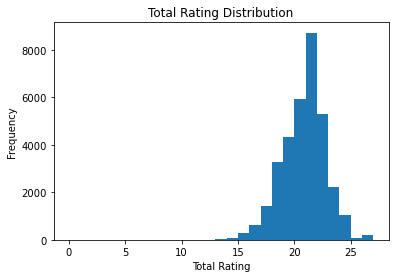

In [14]:
Total_Rating_Dist = bridges2.loc[:, 'Total_Rating']
fig, at = plt.subplots(1, 1)
at.hist(Total_Rating_Dist, bins=27, density=False)
_ = at.set_xlabel('Total Rating')
_ = at.set_ylabel('Frequency')
at.set_title('Total Rating Distribution')

This shows that the distribution of the outcome variable representing bridge condition (Total_Rating) is approximately normal, therefore regression analysis should work well.

## Section 2: Exploratory Analysis

This next section will look at:

* Relationships between each of the predictor variables (Age (derived from variable Year), Average use (variable AverageDaily), Percent trucks (variable Trucks_percent), Material (variable SimpMat), Design (variable SimpDes)) and the outcome variable (Bridge condition (variable Total_Rating))

* Relationships between predictor variables

As there are continuous and categorical variables in this data, several different methods will be used to analyse the data. The methods used will be correlation analysis, boxplot comparison, cross tables and categorical comparison graphs.

Before begining the analysis, a new data frame is created named 'bridges_analysis' which includes only the variables that will be analysed. This gives a tidier data frame containing only relavent information and can be seen below.

In [15]:
bridges_analysis = bridges2.loc[:, ('AverageDaily', 'Trucks_percent', 'SimpMat', 'SimpDes', 'Age_In_Years', 'Total_Rating')]
bridges_analysis

,AverageDaily,Trucks_percent,SimpMat,SimpDes,Age_In_Years,Total_Rating
Structure_id,,,,,,
000021521-00101,1,0.0,Concrete,Slab,16,23
000021521-00181,1,0.0,Concrete,Slab,16,22
000021521-TMP20,100,0.0,Concrete,Beam,9,24
000021525-00012,80,0.0,Other,Beam,71,18
000021580-00092,150,4.0,Concrete,Beam,17,23
...,...,...,...,...,...,...
DAPFORHOO000012,300,40.0,Concrete,Beam,27,21
DAPFORHOO000013,300,40.0,Concrete,Beam,21,21
DAPFORHOO000015,1200,25.0,Concrete,Beam,25,21


### 2. A. Relationships Between Continuous Variables
Correlation analysis can be used to analyse the relationships between continuous variable. The continuous variables in the bridges_analysis data set are: AverageDaily, Trucks_percent, Age_In_Years, and Total_Rating

This analysis will start with a correlation table which will show the correlation coefficient between each of the variables. Following this table will be two visualisations. 

The first will be a heat map where the more correlated two variables are, the darker the colour of the square associated with those two variables. Positive correlations will appear in blue and negative correlations will appear in red.


The final visualisation will be a scatter matrix. This is a matrix showing the scatter plots of each pair of variables. From this the relationships in the correlation table/heat maps should be visable. The scatter matrix also shows the distribution of each variable.

In [16]:
bridges_analysis.corr()

,AverageDaily,Trucks_percent,Age_In_Years,Total_Rating
AverageDaily,1.000000,0.024478,-0.045064,0.031052
Trucks_percent,0.024478,1.000000,0.226418,-0.045093
Age_In_Years,-0.045064,0.226418,1.000000,-0.589858
Total_Rating,0.031052,-0.045093,-0.589858,1.000000


Text(0.5, 1.0, 'Correlation Heat Map of Continuous Variables')

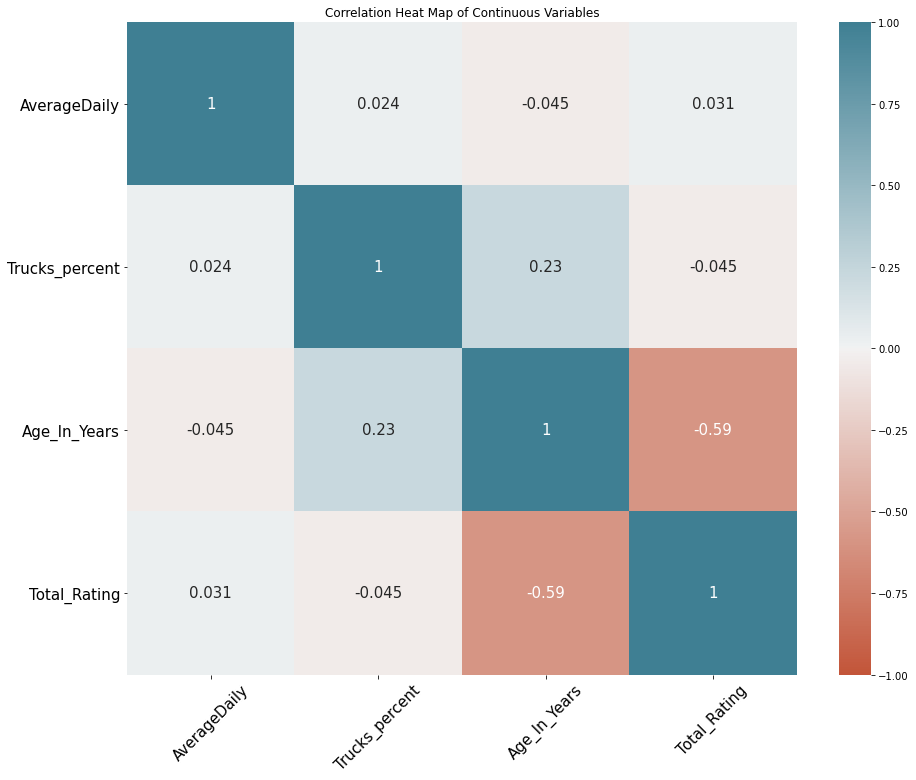

In [17]:
fig,ax = plt.subplots(1,1, figsize=(15,12))
sns.heatmap(bridges_analysis.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)
ax.set_title('Correlation Heat Map of Continuous Variables')

Text(0.5, 0.98, 'Scatter Matrix of Continuous Variables')

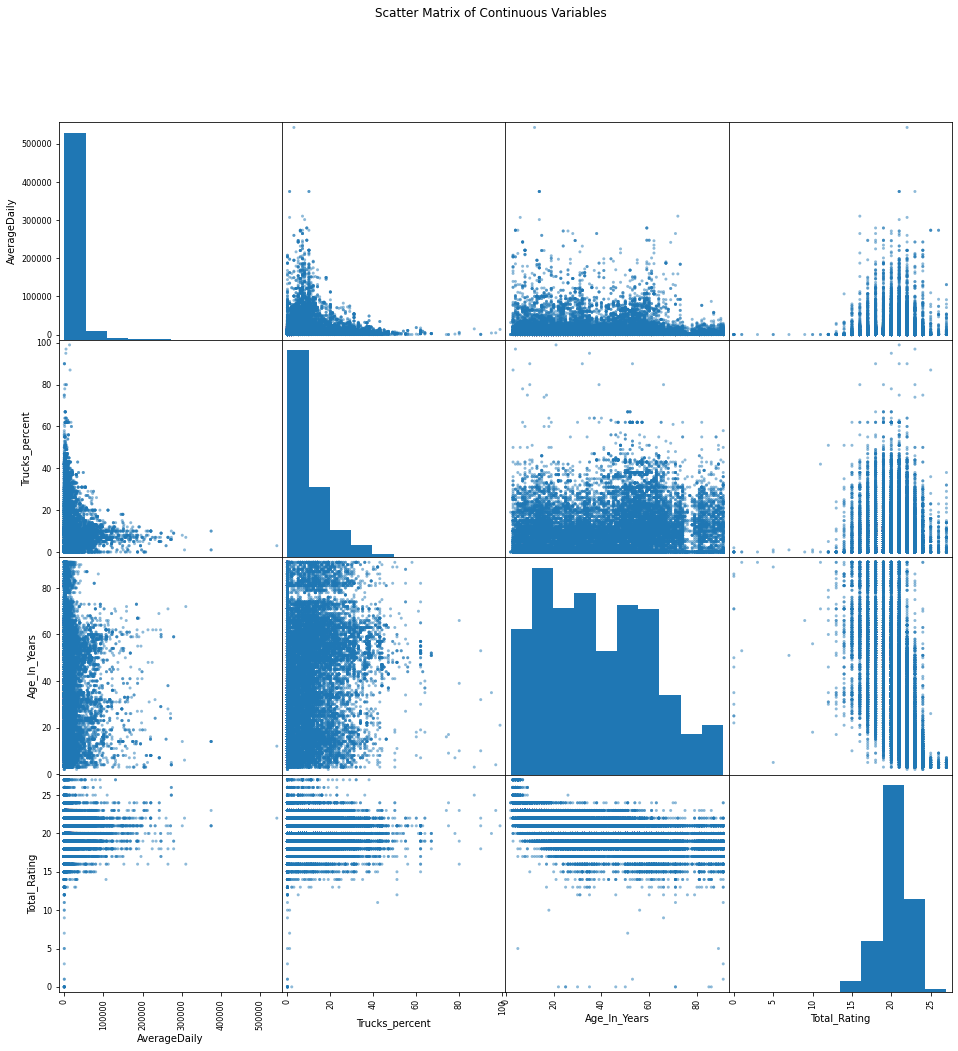

In [18]:
_a = pd.plotting.scatter_matrix(bridges_analysis, figsize=(16,16))
plt.suptitle('Scatter Matrix of Continuous Variables')

* The correlation table and heat map show that the Age_In_Years is particularly strongly related to the Total Rating. They are negatively related which shows that the older the bridge, the worse its overall condition tends to be. This is to be expected as one would assume that with age a bridge's condition would degrade and that new bridges should in their best condition. This relationship is reflected in the scatterplot, however, interestingly in the scatterplot we see that there are some new bridges that have a low total rating score. This may not be due to corrosion or degradation but possibly to do with a fault in the building method causing the bridge to fail.

* The correlation table and heat map show that Trucks_percent and Total_Rating have a very low correlation with a correlation coefficiant close to zero. The coefficiant value is negative suggesting that bridges with a higher percentage of trucks are in slightly worse condition. The lack of a strong relationship is reflected in the scatterplot where the Total_Rating seems almost normally distributed with regards to Trucks_percent.

* The correlation table and heat map show that AverageDaily and Total_Rating have a very low correlation with a correlation coefficiant close to zero. The coefficiant value is positve suggesting that bridges with a higher count of daily use are in slightly better condition. The lack of a strog relationship is reflected in the scatterplot where the Total_Rating seems almost normally distributed with regards to AverageDaily.

* The low correlation between daily usage and tuck usage with bridge condition, may be due to condition issues arising from usage being met with appropriate maintanence.

* The correlation table and heat map show that there is no significant relationship between any of the predictor variables in this case. This bodes well for a regression analysis as it shows that it is likely that these predictor variables influence each other very little.

* Overall, from this initial correlational analysis, one would expect age to be a strong predictor of bridge condition with average usage and trucks percentage being far weaker predictors of bridge condition.

* It is also worth noting with regards to the distribution of each variable on the diagonal axis of the matrix that both AverageDaily and Trucks_percent are both heavily positively skewed.

### 2. B. Relationships Between Categorical and Continuous Variables

To analyse relationships between categorical variables and continuous variables
boxplots can be used. The boxplots will show the distribution of the categorical variables with regards to the continuous variable in question. From this, the distributions of the categories can be compared.

The first two boxplots will look at the relationship between each of the categorical variables (Materials and Design respectively) and the outcome variable (Total_Rating).

Text(0.5, 0, 'Design')

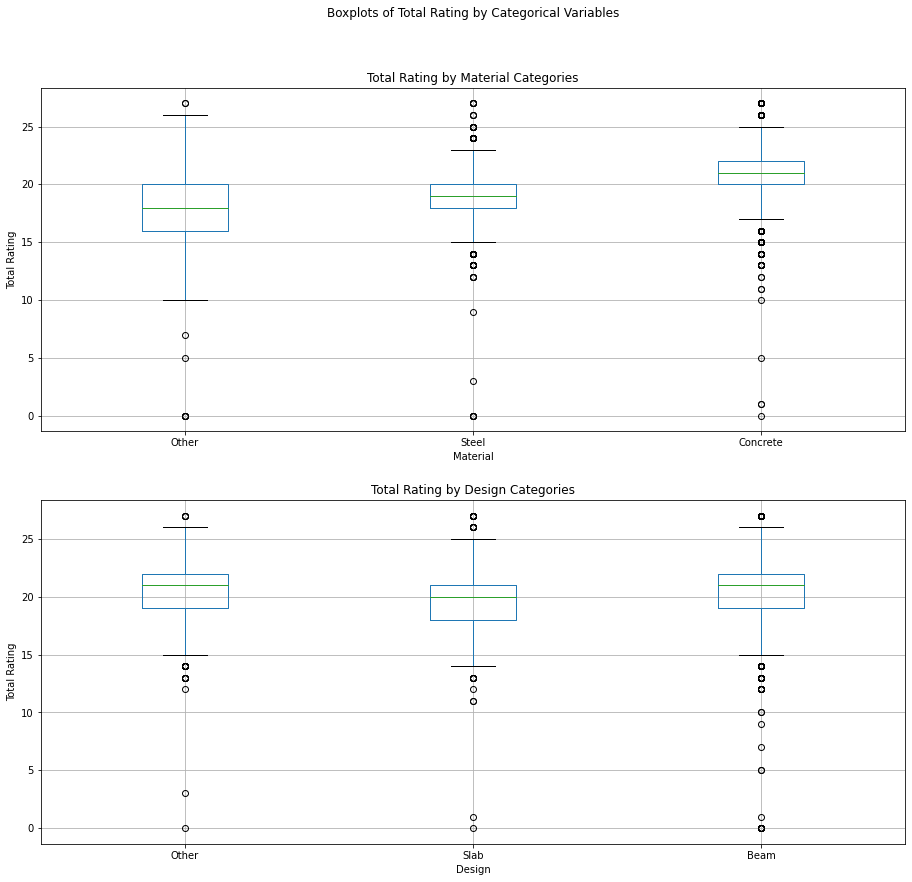

In [19]:
fig, (a1, a2) = plt.subplots(2,1, figsize=(15,14))

bridges_analysis.boxplot(column='Total_Rating', by='SimpMat', ax=a1)
bridges_analysis.boxplot(column='Total_Rating', by='SimpDes', ax=a2)

fig.suptitle('Boxplots of Total Rating by Categorical Variables')
a1.set_title('Total Rating by Material Categories')
a2.set_title('Total Rating by Design Categories')
a1.set_ylabel('Total Rating')
a2.set_ylabel('Total Rating')
a1.set_xlabel('Material')
a2.set_xlabel('Design')

* The first boxplot above shows a difference in Total_Rating depending on the bridge material. Specifically, the Total_Rating of concrete bridges tend to be higher than the Total_Rating of steel bridges. This shows that concrete bridges are generally in better condition than steel bridges. While the mean of the 'Other' category is lower than the concrete and steel, the range of ratings within the distribution is wider than both steel and concrete. This is expected as the 'Other' category contains bridges made from a variety of materials.

* The first boxplot shows that there is some relationship between the bridge material and the bridge condition, therefore one would expect the material to be a good predictor of bridge condition.

* The second boxplot also shows a significant difference in Total_Rating depending on the bridge design. Specifically, the Total_Rating of beam bridges tend to be higher than the Total_Rating of slab bridges. This shows that beam bridges are generally in better condition than slab bridges. The mean of the 'Other' category is higher than the slab and roughly the same as beam.

* The second boxplot shows that there is some relationship between the bridge design and the bridge condition, therefore one would expect the design to be a predictor of bridge condition.

* The difference in total rating for the categories in the first boxplot are greater than those of the second boxplot. This suggests that the material category might be a better predictor of bridge condition than the design category.



Now each categorical variables will be compared with each of the continuous predictor variables to see if there is any relationship between these variables. This will be in the form of three pairs of boxplots. The first pair of boxplots will look at the categorical variables with regards to age, the second pair with regards to Trucks_precent and the third pair with regards to AverageDaily.

Text(0.5, 0, 'Design')

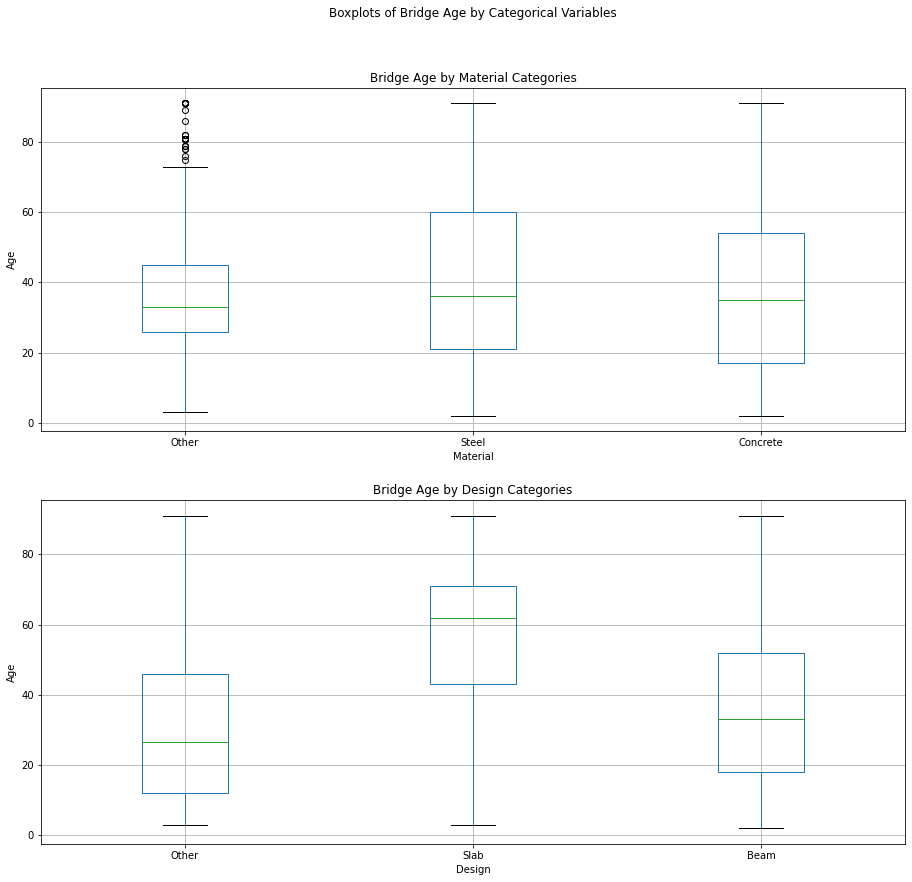

In [20]:
fig, (b1, b2) = plt.subplots(2,1, figsize=(15,14))

bridges_analysis.boxplot(column='Age_In_Years', by='SimpMat', ax=b1)
bridges_analysis.boxplot(column='Age_In_Years', by='SimpDes', ax=b2)


fig.suptitle('Boxplots of Bridge Age by Categorical Variables')
b1.set_title('Bridge Age by Material Categories')
b2.set_title('Bridge Age by Design Categories')
b1.set_ylabel('Age')
b2.set_ylabel('Age')
b1.set_xlabel('Material')
b2.set_xlabel('Design')

* While there are some differences in the range of the distributions of materials with regards to age, the means are similar which gives a good indication that there is not a strong relationship between the bridge material and bridge age.

* There are significant differences between the distributions of design wth regards to age. The slab design bridges tend to be the oldest bridges while beam design and other bridges tend to be newer. This could suggest that Age and Design could be confounding variables and this needs to be considered when interpreting the results of the regression.

Text(0.5, 0, 'Design')

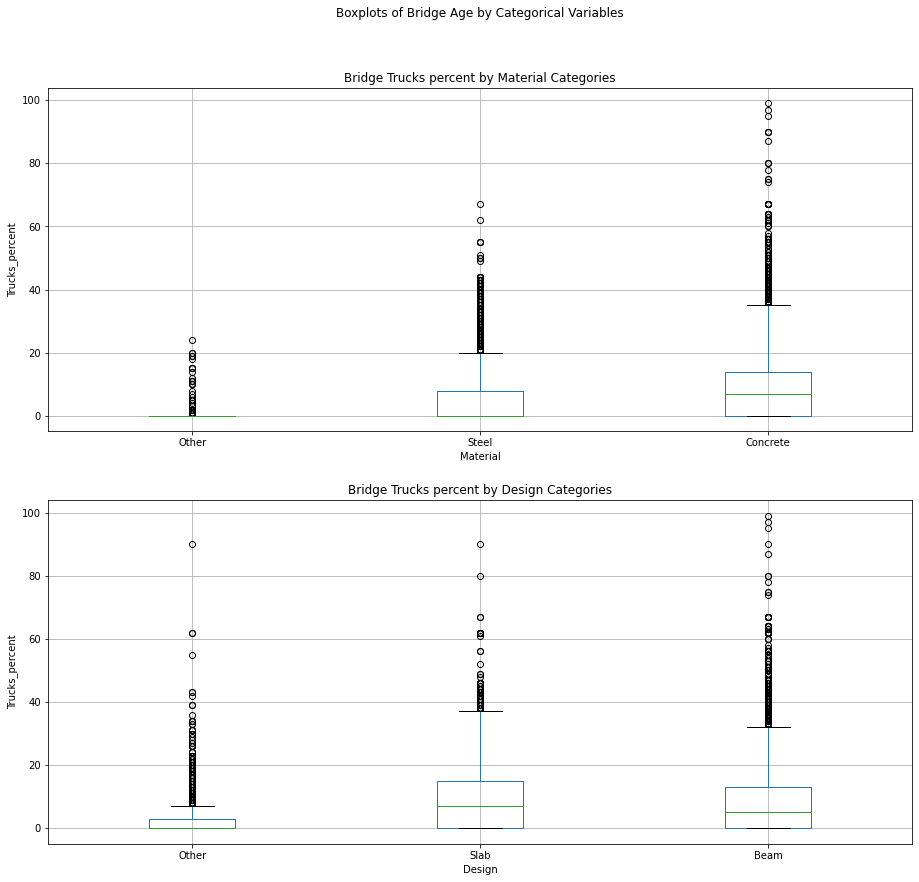

In [21]:
fig, (b1, b2) = plt.subplots(2,1, figsize=(15,14))


bridges_analysis.boxplot(column='Trucks_percent', by='SimpMat', ax=b1)
bridges_analysis.boxplot(column='Trucks_percent', by='SimpDes', ax=b2)


fig.suptitle('Boxplots of Bridge Age by Categorical Variables')
b1.set_title('Bridge Trucks percent by Material Categories')
b2.set_title('Bridge Trucks percent by Design Categories')
b1.set_ylabel('Trucks_percent')
b2.set_ylabel('Trucks_percent')
b1.set_xlabel('Material')
b2.set_xlabel('Design')

* There are some differences between the distributions of material wth regards to trucks_percentage. The concrete bridges tend to have higher percentage of trucks than steel and other bridges. However, these differences seem to be relatively small compared with the range of values. This shows that there might be some relationship between truck percentage and bridge material but not a strong one.

* The percentage of truck usage on the Slab and Beam bridges are roughly the same, however they are both a little higher than the percentage of truck usage on the other bridges. This shows that there might be some relationship between truck percentage and bridge design but not a strong one.

In the following boxplots, as the Average_Daily distribution was particulary skewed, to be able to be visualised better, the log ot the average daily usage has been plotted on the boxplot. This was done by filtering average daily values to include values greater than zero only(as zero has no logarithm and would return a runtime error if included) with the new data frame named 'bridges_logs'. Then the logarithm base 10 of these values was taken. The column of the logarithmic values was added to the new data frame under the variable name 'AverageDailyLog' and the boxplots were drawn from this.

In [22]:
bridges_logs = bridges_analysis.loc[bridges_analysis['AverageDaily'] > 0]
bridges_logs = bridges_logs.assign(AverageDailyLog = np.log10(bridges_logs.AverageDaily))

Text(0.5, 0, 'Design')

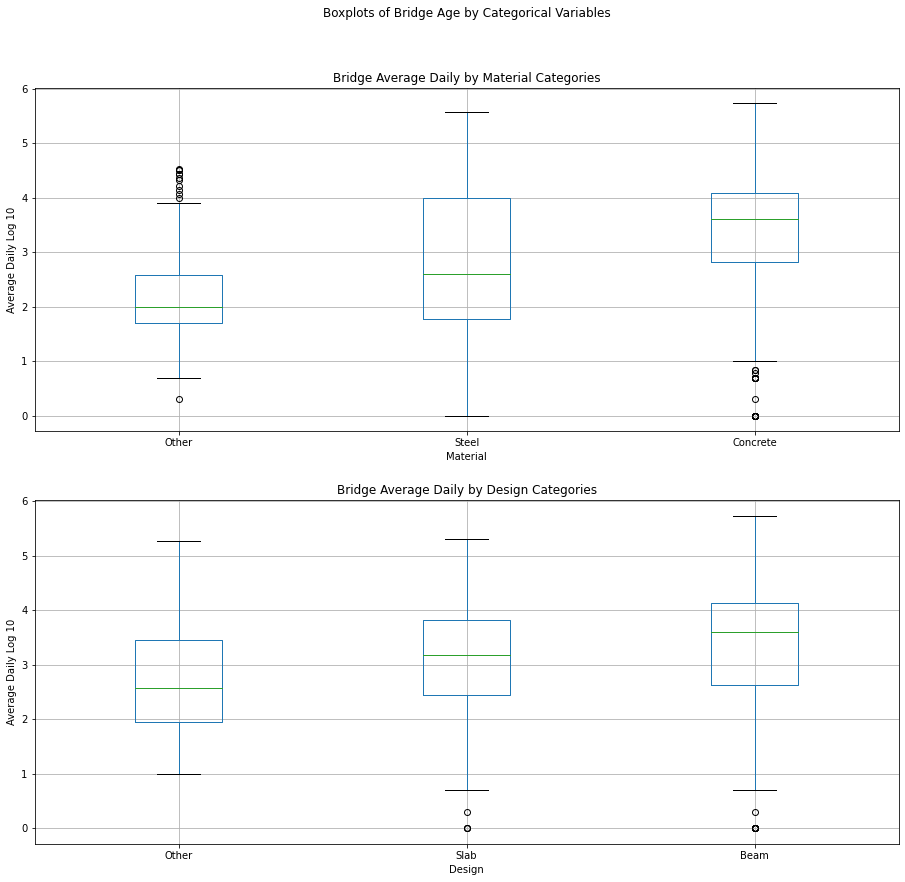

In [23]:
fig, (b1, b2) = plt.subplots(2,1, figsize=(15,14))

bridges_logs.boxplot(column='AverageDailyLog', by='SimpMat', ax=b1)
bridges_logs.boxplot(column='AverageDailyLog', by='SimpDes', ax=b2)

fig.suptitle('Boxplots of Bridge Age by Categorical Variables')
b1.set_title('Bridge Average Daily by Material Categories')
b2.set_title('Bridge Average Daily by Design Categories')
b1.set_ylabel('Average Daily Log 10')
b2.set_ylabel('Average Daily Log 10')
b1.set_xlabel('Material')
b2.set_xlabel('Design')


* There are some differences in the distributions of materials in relation to average daily usage. Specifically concrete bridges tend to be used the most, then steel bridges and finally bridges of other design.

* There are some differences in the means and distributions of design in relation to average daily usage. Specifically, bridges with a beam design tend to get more average daily use than bridges with a slab design and slab design tend to be used more than bridges with an other design. 

* The reasons that there is some relationship between average daily usage and materials and design is that it is likely that the design and materials of a bridge may be selected by how busy that route is likely to be when building the bridge.

### 2. C. Relationships Between Categorical Variables

To analyse relationships between categorical variables cross tabulation and normalisation can be used. The cross table will show joint probabilities of the categories and will include a column for each bridge design category and a row for each bridge material category. The value in each of the corresponding cells will be the probability that that particlar combination of design and material will occur, represented as a percentage rounded to 2 decimal places. This same data is then also visualised as a bar chart with each bar denoting the probability of that combination of design and material.

In [24]:
mat_and_des = pd.crosstab(bridges_analysis.SimpMat, [bridges_analysis.SimpDes], normalize='all')

In [25]:
mat_and_des.round(4) * 100

SimpDes,Other,Slab,Beam
SimpMat,,,
Other,0.17,0.00,1.38
Steel,1.28,0.00,18.15
Concrete,3.12,12.05,63.85


Text(0, 0.5, 'Probability')

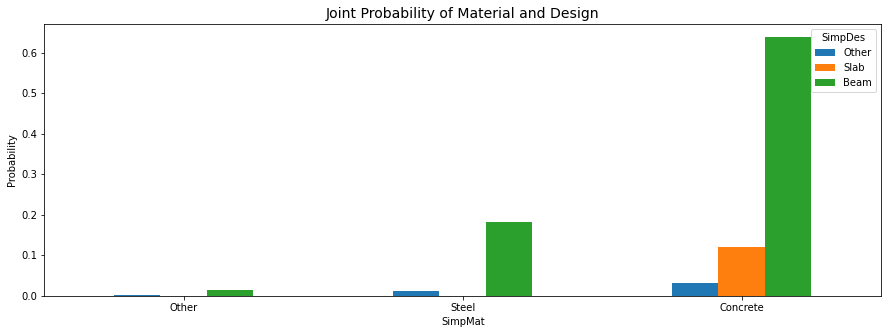

In [26]:
fig,(a1) = plt.subplots(1,1,figsize=(15,5))
fig.subplots_adjust(hspace=0.35)

# Plot one tabulation on each axis WITH CAREFUL TITLES
mat_and_des.plot(kind='bar', subplots=False, ax=a1, rot=0)
a1.set_title('Joint Probability of Material and Design', fontsize=14)
a1.set_ylabel('Probability')


* Something thing that particulary stands out in this data is that all bridges with a slab design are made of concrete. This should be considered when interpreting the regression results as material and design may be confounding varaibles.

* One would possibly then expect to see that bridges with a slab design would have a similar total rating to the total rating of the concrete category bridges. However, looking back at the boxplots in the previous section one can see that slab bridges have a lower total score than concrete bridges. This is likely as slab bridges only make up a small percentage of the total concrete bridges and are an older design, therefore at the lower end of the concrete distribution with regards to total_rating.

## Section 3: Regression Modelling

Now a regression model will be created. This will the be able to show how well the condition of a bridge can be predicted given the values of the predictor variables and how much each variable contributes to the prediction.

### 3. A. Creating Dummy Variables

Before beginning a regression analysis all of the categorical variables need to be changed into numerical values. This can be done by creating a dummy variable and then using reference coding. 

Using the design variable as an example, the other category will be used as the reference. The table will show a row for each bridge and two columns, one for slab and one for beam. Each column will have a value of 1 or 0. If the bridge has a 1 in the slab column, it is a slab design, if it has a 1 in the beam column it is a beam design, if both columns are 0 it is an other design.

Dummy variables are now created for the design and material variables.

In [27]:
SimpDes_d = pd.get_dummies(bridges_analysis.SimpDes, drop_first=True)
SimpDes_d

,Slab,Beam
Structure_id,,
000021521-00101,1,0
000021521-00181,1,0
000021521-TMP20,0,1
000021525-00012,0,1
000021580-00092,0,1
...,...,...
DAPFORHOO000012,0,1
DAPFORHOO000013,0,1
DAPFORHOO000015,0,1


In [28]:
SimpMat_d = pd.get_dummies(bridges_analysis.SimpMat, drop_first=True)
SimpMat_d

,Steel,Concrete
Structure_id,,
000021521-00101,0,1
000021521-00181,0,1
000021521-TMP20,0,1
000021525-00012,0,0
000021580-00092,0,1
...,...,...
DAPFORHOO000012,0,1
DAPFORHOO000013,0,1
DAPFORHOO000015,0,1


Now that every variable can be expressed as numeric values, all of the relavent variables are added to a new data frame for regression named 'bridges_analysis_reg'. The variables in this table are: 'AverageDaily', 'Trucks_percent', 'Age_In_Years', 'Total_Rating', 'Steel', 'Concrete', 'Slab' and 'Beam'.

The data frame can be seen below.

In [29]:
bridges_analysis_reg = bridges_analysis.loc[: , ['AverageDaily', 'Trucks_percent', 'Age_In_Years', 'Total_Rating']]
bridges_analysis_reg = bridges_analysis_reg.join([SimpMat_d, SimpDes_d])
bridges_analysis_reg

,AverageDaily,Trucks_percent,Age_In_Years,Total_Rating,Steel,Concrete,Slab,Beam
Structure_id,,,,,,,,
000021521-00101,1,0.0,16,23,0,1,1,0
000021521-00181,1,0.0,16,22,0,1,1,0
000021521-TMP20,100,0.0,9,24,0,1,0,1
000021525-00012,80,0.0,71,18,0,0,0,1
000021580-00092,150,4.0,17,23,0,1,0,1
...,...,...,...,...,...,...,...,...
DAPFORHOO000012,300,40.0,27,21,0,1,0,1
DAPFORHOO000013,300,40.0,21,21,0,1,0,1
DAPFORHOO000015,1200,25.0,25,21,0,1,0,1


### 3. B. Fitting The Regression Line

Before running the regression analysis, the predictor variables need to be in the correct format. They are transfered into an array and the the regression line is fitted.

In [30]:
y = bridges_analysis_reg.Total_Rating
X2 = np.column_stack((bridges_analysis_reg.AverageDaily, bridges_analysis_reg.Trucks_percent, bridges_analysis_reg.Age_In_Years, bridges_analysis_reg.Steel, bridges_analysis_reg.Concrete, bridges_analysis_reg.Slab, bridges_analysis_reg.Beam))
reg2 = LinearRegression().fit(X2, y)

print('The R2 coefficient of determination is %4.3f' % reg2.score(X2, y))
beta_AverageDaily, beta_Trucks_percent, beta_Age_In_Years, beta_Steel, beta_Concrete, beta_Slab, beta_Beam = reg2.coef_

print('The intercept is %4.1f' % reg2.intercept_)

print('Estimated regression coefficient for AverageDaily is %4.2f' % beta_AverageDaily, 
      'difference in total rating per vehicle count.')
print('Estimated regression coefficient for Trucks_percent is %4.2f' % beta_Trucks_percent, 
      'difference in total rating per truck percentage.')
print('Estimated regression coefficient for Age_In_Years is %4.2f' % beta_Age_In_Years, 
      'difference in total rating per year.')
print('Estimated regression coefficient for Steel is %4.2f' % beta_Steel, 
      'difference in total rating when compared with the dummy vairable Other.')
print('Estimated regression coefficient for Concrete is %4.2f' % beta_Concrete, 
      'difference in total rating when compared with the dummy vairable Other.')
print('Estimated regression coefficient for Slab is %4.2f' % beta_Slab, 
      'difference in total rating pwhen compared with the dummy vairable Other.')
print('Estimated regression coefficient for Beam is %4.2f' % beta_Beam, 
      'difference in total rating when compared with the dummy vairable Other.')

The R2 coefficient of determination is 0.449
The intercept is 19.8
Estimated regression coefficient for AverageDaily is -0.00 difference in total rating per vehicle count.
Estimated regression coefficient for Trucks_percent is 0.01 difference in total rating per truck percentage.
Estimated regression coefficient for Age_In_Years is -0.05 difference in total rating per year.
Estimated regression coefficient for Steel is 1.46 difference in total rating when compared with the dummy vairable Other.
Estimated regression coefficient for Concrete is 2.82 difference in total rating when compared with the dummy vairable Other.
Estimated regression coefficient for Slab is -0.15 difference in total rating pwhen compared with the dummy vairable Other.
Estimated regression coefficient for Beam is -0.09 difference in total rating when compared with the dummy vairable Other.


* The regression analysis returned an R2 coefficient of determination with a value of 0.449, this value can be used to determine how well the prediction fits the data, with 0 being not at all and one being that it totally explains it. This value shows that 44.9% of the varience in bridge condition is explained by the predictor variables and can be considered a good fit.

* The intercept value 19.8. This is the constant in the prediction formula.

* The coefficients reported above show how much of an effect each predictor variable has on the outcome variable.

* It is important to note that these coefficients are related to the units of that particular predictor variable (e.g it is predicted that the total rating of a bridge would decrease by 0.05 for every year of age, and it is prpredicted that a steel bridge would have a total rating of 1.46 points higher than a bridge from the 'Other' category), therefore they can be useful for predicting values and for understanding in real terms how different values of the predictor variables could effect bridge condition. However, they can not be used for direct comparison of the effect sizes of the coefficients.



### 3. C. Comparing Coefficients

To compare coefficients so as to understand which factors have the biggest effect on bridge condition, these coefficients need to be standardised. One way to do this is to use a Z-score standardisation method. However, to do this, the distribution of all of the predictor variables would need to be approximately normal and as seen earlier in the report, some of the predictor distributions in this analysis are skewed.

Therefore a different approach can be used where the change in outcome variable can be calculated as a percentage of it's range from the change of each predictor variable over it's range.

First the range of each variable will be calculated by subtracting the value of the 10th cnetile from the 90th centile.

In [31]:
AverageDaily_range = bridges_analysis_reg.AverageDaily.quantile(0.9) - bridges_analysis_reg.AverageDaily.quantile(0.1)
Trucks_percent_range = bridges_analysis_reg.Trucks_percent.quantile(0.9) - bridges_analysis_reg.Trucks_percent.quantile(0.1)
Age_In_Years_range = bridges_analysis_reg.Age_In_Years.quantile(0.9) - bridges_analysis_reg.Age_In_Years.quantile(0.1)
Steel_range = bridges_analysis_reg.Steel.quantile(0.9) - bridges_analysis_reg.Steel.quantile(0.1)
Concrete_range = bridges_analysis_reg.Concrete.quantile(0.9) - bridges_analysis_reg.Concrete.quantile(0.1)
Slab_range = bridges_analysis_reg.Slab.quantile(0.9) - bridges_analysis_reg.Slab.quantile(0.1)
Beam_range = bridges_analysis_reg.Beam.quantile(0.9) - bridges_analysis_reg.Beam.quantile(0.1)
Total_Rating_range = bridges_analysis_reg.Total_Rating.quantile(0.9) - bridges_analysis_reg.Total_Rating.quantile(0.1)

print('AverageDaily_range (10th to 90th centile) is %3.1f' % AverageDaily_range, 'count')
print('Trucks_percent_range (10th to 90th centile) is %3.1f' % Trucks_percent_range, 'percent')
print('Age_In_Years_range (10th to 90th centile) is %3.1f' % Age_In_Years_range, 'years')
print('Steel_range (10th to 90th centile) is %3.1f' % Steel_range)
print('Concrete_range (10th to 90th centile) is %3.1f' % Concrete_range)
print('Slab_range (10th to 90th centile) is %3.1f' % Slab_range)
print('Beam_range (10th to 90th centile) is %3.1f' % Beam_range)
print('Total_Rating_range (10th to 90th centile) is %3.1f' % Total_Rating_range, 'points')

AverageDaily_range (10th to 90th centile) is 29910.0 count
Trucks_percent_range (10th to 90th centile) is 23.0 percent
Age_In_Years_range (10th to 90th centile) is 58.0 years
Steel_range (10th to 90th centile) is 1.0
Concrete_range (10th to 90th centile) is 1.0
Slab_range (10th to 90th centile) is 1.0
Beam_range (10th to 90th centile) is 1.0
Total_Rating_range (10th to 90th centile) is 5.0 points


Now the change in total rating (as a percentage of it's range) given by each predictor can be calculated by taking the coefficient (calculated in the regression analysis above), multiplying it by the range of that variable and then dividing it by the total rating range, this result is then multiplied by 100 to give a percentage.

In [32]:
print ('The change in Total Rating (as a percent of its range) given by the AverageDaily coefficient (over its range) is %4.1f percent'
       % (100 * (beta_AverageDaily * AverageDaily_range) / Total_Rating_range))

print ('The change in Total Rating (as a percent of its range) given by the Trucks_percent coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Trucks_percent * Trucks_percent_range) / Total_Rating_range))

print ('The change in Total Rating (as a percent of its range) given by the Age_In_Years coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Age_In_Years * Age_In_Years_range) / Total_Rating_range))

print ('The change in Total Rating (as a percent of its range) given by the Steel coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Steel * Steel_range) / Total_Rating_range))

print ('The change in Total Rating (as a percent of its range) given by the Concrete coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Concrete * Concrete_range) / Total_Rating_range))

print ('The change in Total Rating (as a percent of its range) given by the Slab coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Slab * Slab_range) / Total_Rating_range))

print ('The change in Total Rating (as a percent of its range) given by the Beam coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Beam * Beam_range) / Total_Rating_range))

The change in Total Rating (as a percent of its range) given by the AverageDaily coefficient (over its range) is -0.4 percent
The change in Total Rating (as a percent of its range) given by the Trucks_percent coefficient (over its range) is  2.6 percent
The change in Total Rating (as a percent of its range) given by the Age_In_Years coefficient (over its range) is -58.5 percent
The change in Total Rating (as a percent of its range) given by the Steel coefficient (over its range) is 29.2 percent
The change in Total Rating (as a percent of its range) given by the Concrete coefficient (over its range) is 56.4 percent
The change in Total Rating (as a percent of its range) given by the Slab coefficient (over its range) is -3.0 percent
The change in Total Rating (as a percent of its range) given by the Beam coefficient (over its range) is -1.9 percent


From these results a direct comparison of coefficients can take place to understand the most important factors in predicting bridge condition.

* The best predictor of bridge condition is a bridge's age. The older the bridge is, the lower it's condition is likely to be.

* With regards to Steel and Concrete they both show that the bridges condition is likely to be better if it is made out of Steel or Concrete than if it was made out of another material. However, the results show that the condition of bridges made of concrete are likely to be better than bridges made of steel. Therefore, for bridges in the area studied, metal corrosion may have a larger effect on bridge condition than the deterioration of concrete. 

* Other predictor variables such as design are much weaker predictors of bridge condition although bridges of a slab design are likely to be in the worst condition (possibly as bridges of this design tend to be older), with beam slightly better and other designs being most likely to be in the best condition.

* The percentage of trucks is also a weak predictor of bridge condition, however, it suggest that the higher the truck percentage the better the condition of the bridge. This may be due to truck drivers opting to use bridges in a better condition.

* The average daily usage is the weakest predictor of the bridge condition. However, from the small effect it has it suggest that the more vehicles using a bridge on a daily basis the worse the condition of the bridge.

* To get a more complete picture of metal corrosion and deterioration of concrete, a similar study including data such as bridge maintanence data and bridge location data could be useful. Bridge maintanence data would give a more complete picture of the upkeep of bridges given a certain material, and location data would give a more complete picture of corrosion and deterioration based on more specific conditions.

* As some of the predictor variables showed relationships with each other during the exploratory analysis, these results must be treated with some amount of caution. A future study could look at controlling for confounding variables using such techniques as ANCOVA (Pourhoseingholi, Baghestani, & Vahedi 2012).


### 3. D. Error Distribution

The distribution of errors can by found be subtracting the actual Total_Ratings value by the Total_Ratings value predicted by the regression analysis. Below the distribution of errors has been visualised by plotting it into a histogram.

Text(0.5, 1.0, 'Error Distribution Historgram')

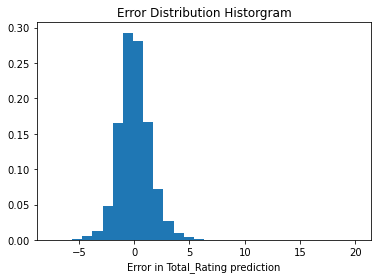

In [33]:
y_hat2 = reg2.predict(X2)

fig, a2 = plt.subplots(1, 1)
residuals2 = y_hat2 - y
a2.hist(residuals2, bins=30, density=True)
_ = a2.set_xlabel('Error in Total_Rating prediction')
a2.set_title('Error Distribution Historgram')

The above distribution shows how the errors are normally distributed about a mean of 0 which is to be expected.

The error can also be visualised in a different way, by plotting each actual Total_Rating score with the line of the predicted Total_Rating.

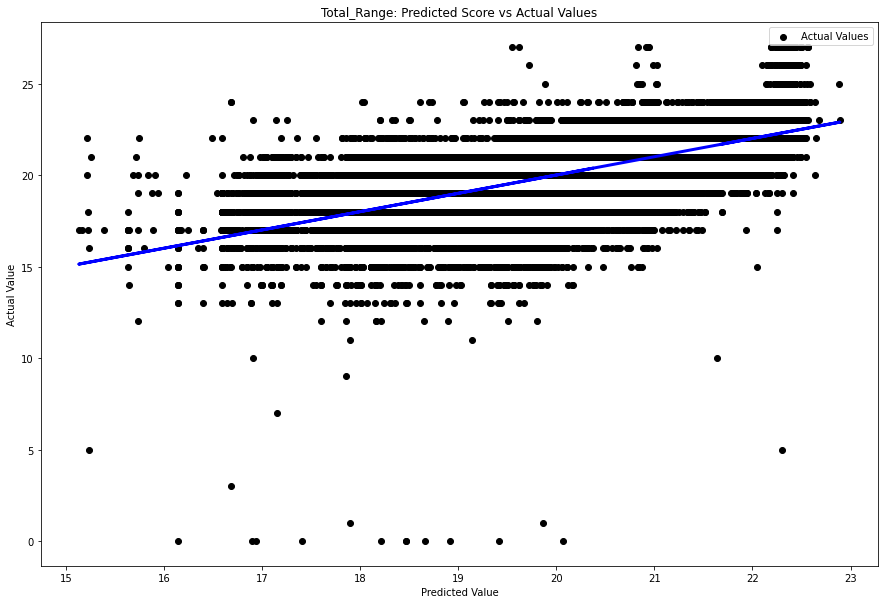

In [34]:
fig, a2 = plt.subplots(1,1,figsize=(15,10))
actual_values = a2.scatter(y_hat2, y,  color='black')
a2.plot(y_hat2, y_hat2, color='blue', linewidth=3)

a2.set_xlabel('Predicted Value')
a2.set_ylabel('Actual Value')
a2.set_title('Total_Range: Predicted Score vs Actual Values')
a2.legend([actual_values], ['Actual Values'])



In the above plot the blue line denotes the Total_Rating values preducted by the regression analysis and the black dots denote the actual Total_Rating values found in the data. From this plot, the error is very clear as that is seen as the distance between the black dots and the blue line.

### 3. E. Conclusion

* The proposed predictor variables (Age, Average use, Percent trucks, Material, and Design) are good predictors of bridge condition, together accounting for 44.9% of the variance in the outcome variable bridge condition.

* The variable that has the biggest comparative effect on bridge condition is Age, closely followed by Material.

* The variable with the lowest comparative effect on bridge condition is Average use.

* It must be noted that as some of the predictor variables interact with each other these results must be treated with caution and a future study using techniques to control for this (such as ANCOVA) may give more accurate results.

### Section 4: References

Pourhoseingholi, M. A., Baghestani, A. R., & Vahedi, M. (2012). How to control confounding effects by statistical analysis. Gastroenterology and hepatology from bed to bench, 5(2), 79.